Lab2: Understanding Sampling and Quantization using Python

2.1 Understanding Sampling using Python

Enter Input Signal Frequency: 30
Enter Sampling Frequency: 300


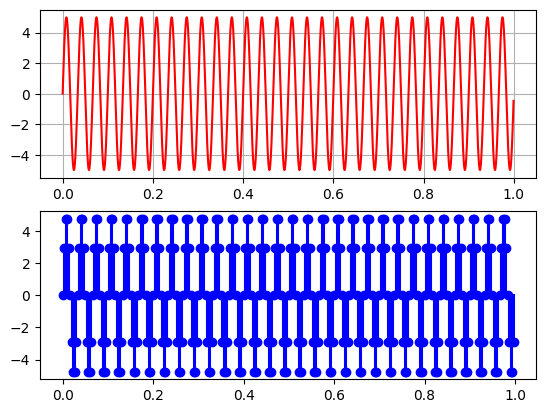

In [2]:
import numpy as np
import matplotlib.pyplot as plt

f = float(input("Enter Input Signal Frequency: "))
t = np.arange(0, 1, 0.0005)  # Continuous time vector
xt = 5 * np.sin(2 * np.pi * f * t)
plt.subplot(2, 1, 1)
plt.plot(t, xt, 'r')
plt.grid(True)

Fs = float(input("Enter Sampling Frequency: "))
T = 1 / Fs
n = np.arange(0, 1, T)  # Discrete time vector
xn = 5 * np.sin(2 * np.pi * f * n)
plt.subplot(2, 1, 2)
plt.stem(n, xn, linefmt='b-', markerfmt='bo', basefmt='b-')
plt.show()


2.2 Understanding Undersampling and Oversampling using Python

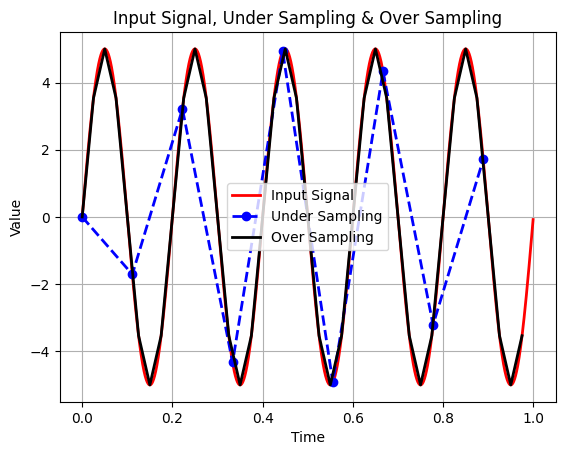

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Input Signal (Considered as a Continuous Signal)
f = 5
t = np.arange(0, 1, 0.0005)  # Continuous time vector
xt = 5 * np.sin(2 * np.pi * f * t)
plt.plot(t, xt, 'r', linewidth=2)
plt.grid(True)
plt.title('Input Signal, Under Sampling & Over Sampling')
plt.xlabel('Time')
plt.ylabel('Value')

# Under Sampling
Fs_under = 9
T_under = 1 / Fs_under
n_under = np.arange(0, 1, T_under)  # Discrete time vector for under sampling
xn_under = 5 * np.sin(2 * np.pi * f * n_under)
plt.plot(n_under, xn_under, 'b--o', linewidth=2)

# Higher Sampling
Fs_upper = 40
T_upper = 1 / Fs_upper
n_upper = np.arange(0, 1, T_upper)  # Discrete time vector for higher sampling
xn_upper = 5 * np.sin(2 * np.pi * f * n_upper)
plt.plot(n_upper, xn_upper, 'black', linewidth=2)

plt.legend(['Input Signal', 'Under Sampling', 'Over Sampling'])
plt.show()


2.3 Understanding Aliasing effect in sampling using python

Aliasing Frequency = 7


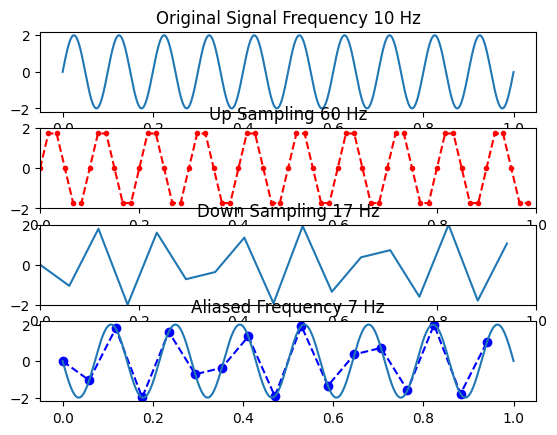

In [6]:
import numpy as np
import matplotlib.pyplot as plt

f = 10
t = np.arange(0, 1, 0.0001)
xt = 2 * np.sin(2 * np.pi * f * t)
plt.subplot(4, 1, 1)
plt.plot(t, xt)
plt.title('Original Signal Frequency {} Hz'.format(f))

# Up Sampling
Fs = 6 * f
n = np.arange(0, 1, 1 / Fs)
xn = 2 * np.sin(2 * np.pi * f * n)
plt.subplot(4, 1, 2)
plt.plot(n, xn, 'r--.')
plt.axis([0, 1, -2, 2])
plt.title('Up Sampling {} Hz'.format(Fs))

# Down Sampling
Fs_down = 17
n_down = np.arange(0, 1, 1 / Fs_down)
xn_down = 2 * np.sin(2 * np.pi * f * n_down)
plt.subplot(4, 1, 3)
plt.plot(n_down, xn_down)
plt.axis([0, 1, -2, 2])
plt.title('Down Sampling {} Hz'.format(Fs_down))

# Check for Aliasing Effect
got_aliasing = False

if 2 * f > Fs_down:
    aliasing_freq = None

    for i in range(1, 11):
        aliasing_freq = np.abs(f - (i * Fs_down))
        if np.abs(f - (i * Fs_down)) <= Fs / 2:
            print('Aliasing Frequency =', aliasing_freq)
            got_aliasing = True
            break

# Plotting if Aliasing Exists
if got_aliasing:
    plt.subplot(4, 1, 4)
    plt.plot(n_down, xn_down, 'b--o')

    if Fs_down > f:
        aliased_xn = 2 * np.sin(2 * np.pi * aliasing_freq * t + np.pi)
    else:
        aliased_xn = 2 * np.sin(2 * np.pi * aliasing_freq * t)

    plt.plot(t, aliased_xn)
    plt.title('Aliased Frequency {} Hz'.format(aliasing_freq))
else:
    plt.subplot(4, 1, 4)
    plt.title('No Aliasing Because of Frequency {} Hz'.format(aliasing_freq))

plt.show()


2.4 Understanding Quantization using Python

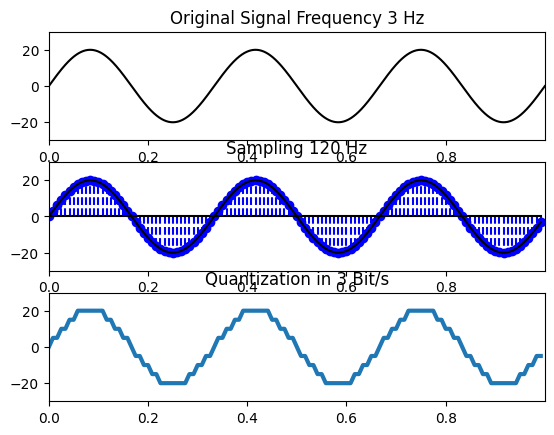

In [7]:
import numpy as np
import matplotlib.pyplot as plt

f = 3
A = 20
t = np.arange(0, 1, 0.0001)
xt = A * np.sin(2 * np.pi * f * t)
plt.subplot(3, 1, 1)
plt.plot(t, xt, 'black')
plt.title('Original Signal Frequency {} Hz'.format(f))
plt.axis([0, max(t), -A-10, A+10])

# Up Sampling
Fs = 40 * f
n = np.arange(0, 1, 1/Fs)
xn = A * np.sin(2 * np.pi * f * n)
plt.subplot(3, 1, 2)
plt.stem(n, xn, linefmt='b--.', markerfmt='bo', basefmt='black')
plt.plot(n, xn, 'black')
plt.axis([0, max(t), -A-10, A+10])
plt.title('Sampling {} Hz'.format(Fs))

# Quantization
no_of_bits = 3
total_levels = 2**no_of_bits
step_size = (max(xn) - min(xn)) / total_levels
xq = np.round(xn / step_size) * step_size

plt.subplot(3, 1, 3)
plt.plot(n, xq, linewidth=3)
plt.axis([0, max(t), -A-10, A+10])
plt.title('Quantization in {} Bit/s'.format(no_of_bits))

plt.show()
